<a href="https://colab.research.google.com/github/nathasha-naranpanawa/COMP4702_2024/blob/main/PracW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# load preferred dataset
fd1 = "Data/83_Loeschcke_et_al_2000_Thorax_&_wing_traits_lab pops.csv"
fd2 = "Data/84_Loeschcke_et_al_2000_Wing_traits_&_asymmetry_lab pops.csv"
fd3 = "Data/85_Loeschcke_et_al_2000_Wing_asymmetry_lab_pops.csv"

df = pd.read_csv(fd1)

In [42]:
# Define the label the model will classify
Label_name = 'Sex'

# Move the classifier column to the zeroth index
col = df.pop(Label_name)
df.insert(0, Label_name, col)

In [43]:
# Find columns of all the same value
all_same_value = df.nunique() == 1

# Print columns with all the same value
print("Columns with all the same value:")
print(all_same_value[all_same_value].index.tolist())

Columns with all the same value:
['Year_start', 'Year_end']


In [44]:
# List of columns to drop
columns_to_drop = ['Population','Latitude','Longitude','Vial', 'Replicate']
columns_to_drop.extend(all_same_value[all_same_value].index.tolist())

# Delete unnecessary columns
df.drop(columns=columns_to_drop, inplace=True)

# Print data labels
print(df.columns.tolist())

['Sex', 'Species', 'Temperature', 'Thorax_length', 'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3', 'wing_loading']


In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [46]:
# Count non-null values per row
non_null_counts = df.notnull().sum(axis=1)

# Remove rows with more than 3 data entries missing
threshold = df.shape[1] - 3

# Filter rows based on the threshold
df = df[non_null_counts >= threshold]

In [47]:
# Initialize SimpleImputers with appropriate strategies
fill_most_frequent = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
fill_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

Label_encoder_classifier = LabelEncoder()

# Iterate over columns in DataFrame
for column in df.columns:
    if isinstance(df[column][1], str):
        # For categorical columns, fill with most frequent value
        df[column] = pd.DataFrame(fill_most_frequent.fit_transform(df[[column]]))
        if df[column][1] == df[Label_name][1]:
            df[column] = pd.DataFrame(Label_encoder_classifier.fit_transform(df[column]))
        else:
            df[column] = pd.DataFrame(LabelEncoder().fit_transform(df[column]))
    else:
        # For numeric columns, fill with mean value
        df[column] = pd.DataFrame(fill_mean.fit_transform(df[[column]]))  # Fill missing values with mean

In [48]:
from sklearn.model_selection import train_test_split

# Extract features (columns 1-8) and labels (column 9)
X = df.iloc[:, 1:].values  # Features
y = df.iloc[:, 0].values    # Labels

# Shuffle and split the data
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Q1

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# TODO: Train an SVM on the above data using a linear kernel and set parameter C = 1
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# Q2

In [50]:
# TODO: make predictions on train and hold out sets with trained SVM
y_pred_train = svm.predict(X_train)
y_pred_holdout = svm.predict(X_holdout)

# TODO: Record the classification accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
print("Train accuracy:", train_accuracy*100.00)
print("Holdout accuracy:", holdout_accuracy*100)

# TODO: Show confusion matrices
train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
holdout_confusion_matrix = confusion_matrix(y_holdout, y_pred_holdout)
print("Train confusion matrix:")
print(train_confusion_matrix)
print("Holdout confusion matrix:")
print(holdout_confusion_matrix)

Train accuracy: 94.50867052023122
Holdout accuracy: 94.81268011527378
Train confusion matrix:
[[638  51]
 [ 25 670]]
Holdout confusion matrix:
[[159  11]
 [  7 170]]


# Q3

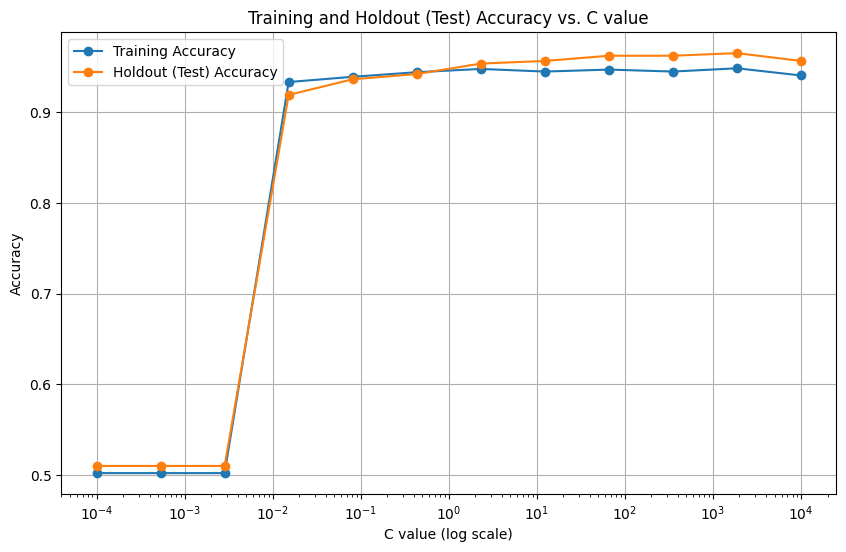

In [51]:
# Vary the C parameter on a logarithmic scale, and show how it influences the training

# TODO: Create a list of C values on logarithmic scale to try
C_values = np.logspace(-4, 4, 12)

# TODO: Train and evaluate a model for each C value
train_accuracy_list = []
holdout_accuracy_list = []

for C in C_values:
  # TODO: train SVM
  svm = SVC(kernel='linear', C=C)
  svm.fit(X_train, y_train)
  
  # TODO: Predict target values
  y_pred_train = svm.predict(X_train)
  y_pred_holdout = svm.predict(X_holdout)
  
  # TODO: Calculate and record accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
  
  train_accuracy_list.append(train_accuracy)
  holdout_accuracy_list.append(holdout_accuracy)


# TODO: Plot the training and testing error as a function of C
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy_list, label='Training Accuracy', marker='o')
plt.plot(C_values, holdout_accuracy_list, label='Holdout (Test) Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Training and Holdout (Test) Accuracy vs. C value')
plt.legend()
plt.grid(True)
plt.show()

# Q4

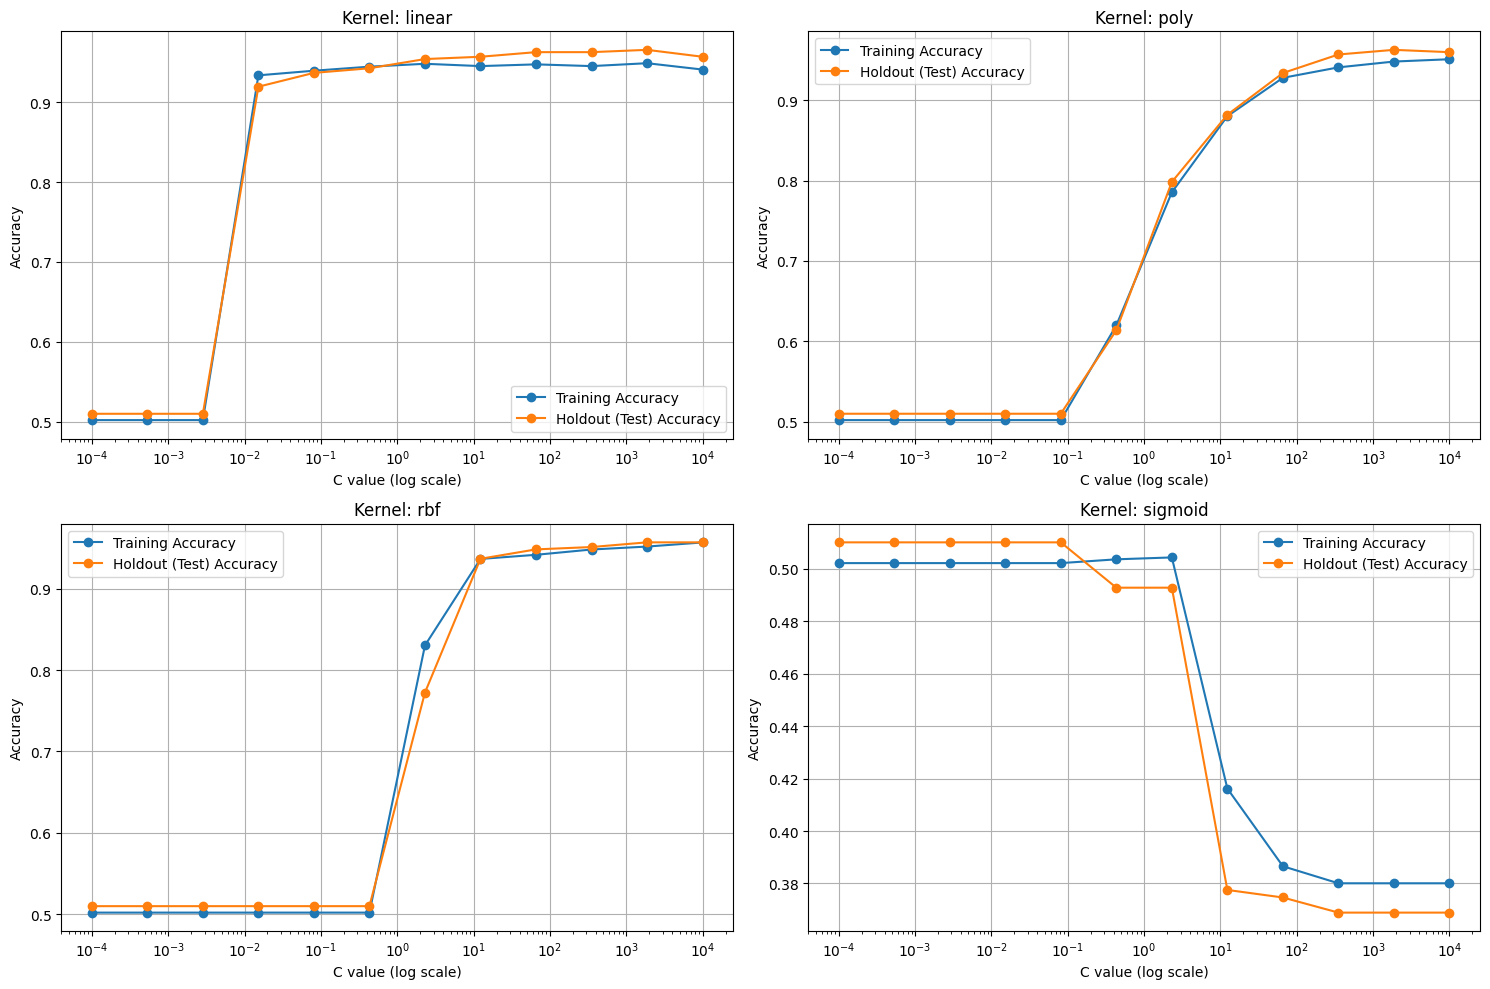

In [52]:
# Experiment with different kernel functions, for a list  of C values, and show how it influences the training and testing error

# TODO: Create a list of kernel functions to try
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']

# TODO: Train and evaluate a model for each kernel function
train_accuracy_list = []
holdout_accuracy_list = []

for kernel in kernel_functions:
  train_accuracies = []
  holdout_accuracies = []
  
  for C in C_values:
    # TODO: train SVM
    svm = SVC(kernel=kernel, C=C)
    svm.fit(X_train, y_train)
    
    # TODO: Predict target values
    y_pred_train = svm.predict(X_train)
    y_pred_holdout = svm.predict(X_holdout)
    
    # TODO: Calculate and record accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
    
    train_accuracies.append(train_accuracy)
    holdout_accuracies.append(holdout_accuracy)
    
  train_accuracy_list.append(train_accuracies)
  holdout_accuracy_list.append(holdout_accuracies)
# TODO: Plot the training and testing error as a function of kernel and C
plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernel_functions):
    plt.subplot(2, 2, i+1)
    plt.plot(C_values, train_accuracy_list[i], label='Training Accuracy', marker='o')
    plt.plot(C_values, holdout_accuracy_list[i], label='Holdout (Test) Accuracy', marker='o')
    plt.xscale('log')
    plt.xlabel('C value (log scale)')
    plt.ylabel('Accuracy')
    plt.title(f'Kernel: {kernel}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


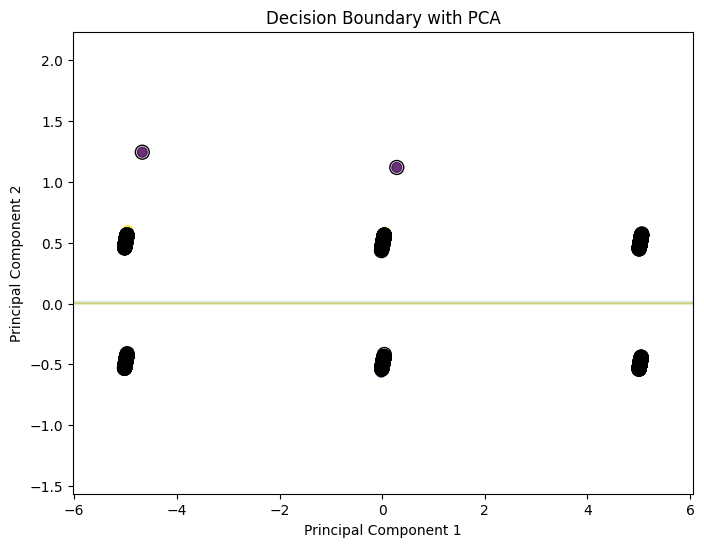

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your 12-dimensional feature matrix and y is the target variable
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit SVM on the reduced data
clf = SVC(kernel='linear')
clf.fit(X_pca, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

# Create meshgrid to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap='Set3', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary with PCA')
plt.show()